# Final Project

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['CF_Easting_m'], df['CF_Northing_m'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf.plot(marker='o', color='blue', markersize=5, figsize=(10, 10))
plt.title('Frost Probing Locations')
plt.show()

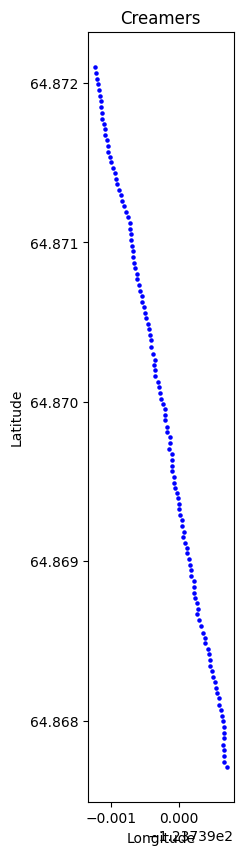

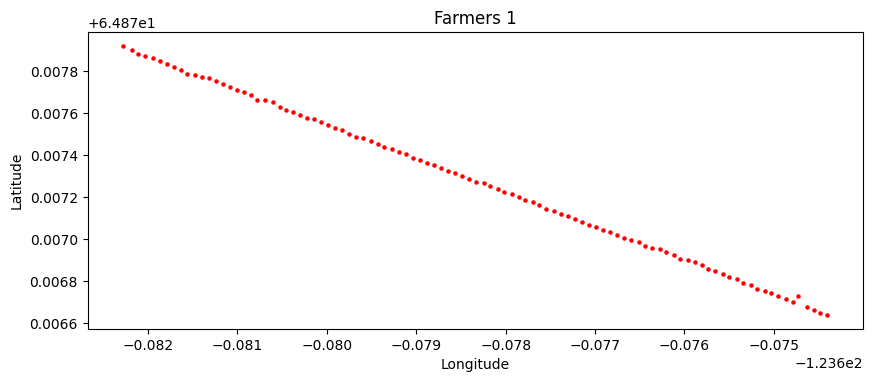

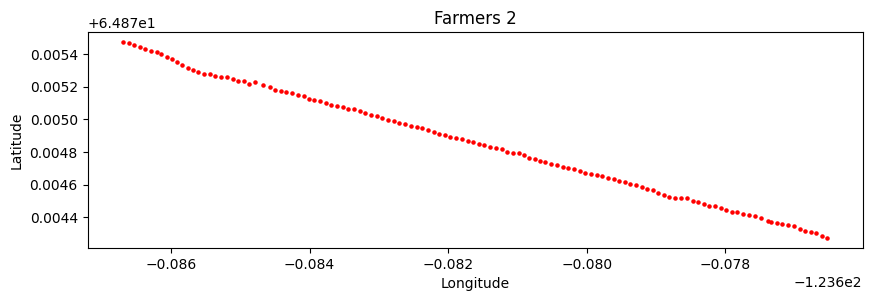

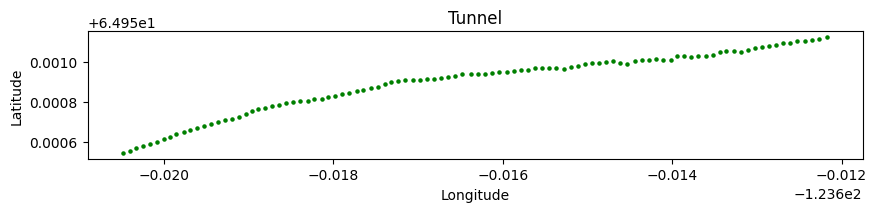

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

file_path = '/Users/Azadeh/CRREL.xlsx'

df_sheet1 = pd.read_excel(file_path, sheet_name='Creamers')
df_sheet2 = pd.read_excel(file_path, sheet_name='Farmers 1')
df_sheet3 = pd.read_excel(file_path, sheet_name='Farmers 2')
df_sheet4 = pd.read_excel(file_path, sheet_name='Tunnel')

def create_geodataframe(df, x_col, y_col):
    geometry = [Point(xy) for xy in zip(df[x_col], df[y_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

gdf_sheet1 = create_geodataframe(df_sheet1, 'CF_Easting_m', 'CF_Northing_m')
gdf_sheet2 = create_geodataframe(df_sheet2, 'FL1_Easting_m', 'FL1_Northing_m')
gdf_sheet3 = create_geodataframe(df_sheet3, 'FL2_Easting_m', 'FL2_Northing_m')
gdf_sheet4 = create_geodataframe(df_sheet4, 'PT_Easting_m', 'PT_Northing_m')

gdf_sheet1.set_crs(epsg=32610, inplace=True)
gdf_sheet2.set_crs(epsg=32610, inplace=True)
gdf_sheet3.set_crs(epsg=32610, inplace=True)
gdf_sheet4.set_crs(epsg=32610, inplace=True)

gdf_sheet1_geo = gdf_sheet1.to_crs(epsg=4326)
gdf_sheet2_geo = gdf_sheet2.to_crs(epsg=4326)
gdf_sheet3_geo = gdf_sheet3.to_crs(epsg=4326)
gdf_sheet4_geo = gdf_sheet4.to_crs(epsg=4326)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_sheet1_geo.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.title('Creamers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_sheet2_geo.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Farmers 1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_sheet3_geo.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Farmers 2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_sheet4_geo.plot(ax=ax, marker='o', color='green', markersize=5)
plt.title('Tunnel')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
import pandas as pd
df = pd.read_excel('/Users/Azadeh/CRREL.xlsx')
df

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()
print(df.isnull().sum())
missing_data = df[df.isnull().any(axis=1)]
print(missing_data)

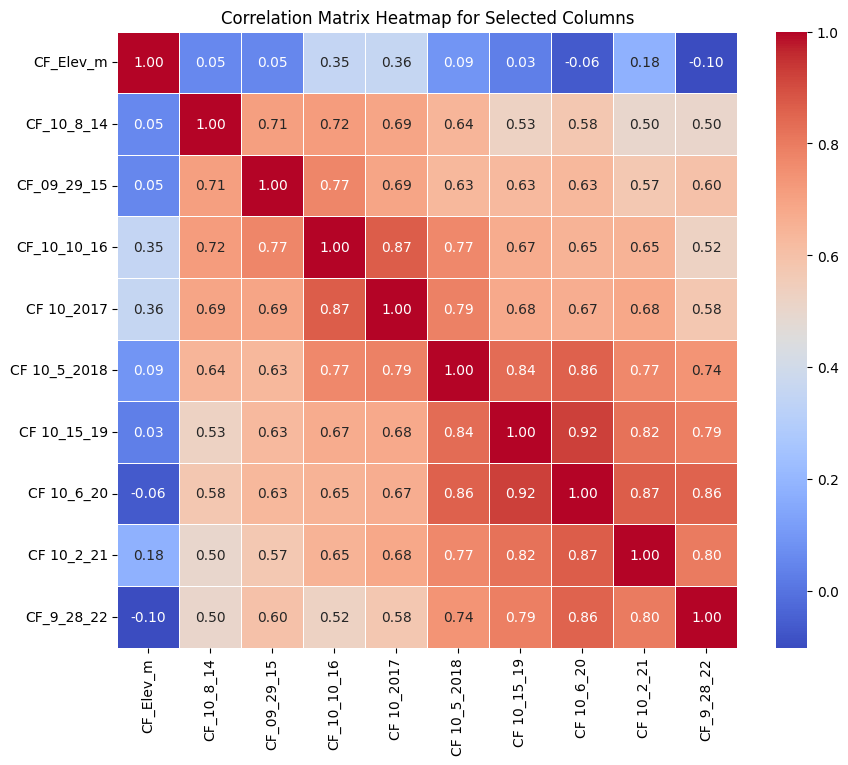

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/Azadeh/CRREL.xlsx'
sheet_name = 'Creamers'

df = pd.read_excel(file_path, sheet_name=sheet_name)

columns_of_interest = [
    'CF_Elev_m', 'CF_10_8_14', 'CF_09_29_15', 'CF_10_10_16', 'CF 10_2017',
    'CF 10_5_2018', 'CF 10_15_19', 'CF 10_6_20', 'CF 10_2_21', 'CF_9_28_22'
]

df_selected = df[columns_of_interest]

corr_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap for Selected Columns')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster

geometry = [Point(xy) for xy in zip(df['CF_Easting_m'], df['CF_Northing_m'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf.crs = 'EPSG:32606'

gdf = gdf.to_crs(epsg=4326)

df['latitude'] = gdf.geometry.y
df['longitude'] = gdf.geometry.x

print(df[['CF_Point', 'latitude', 'longitude']])

df = df.dropna(subset=['latitude', 'longitude'])

map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=f"Point ID: {row['CF_Point']}").add_to(marker_cluster)

m.save('frost_probing_locations.html')
m

     CF_Point   latitude   longitude
0         1.0  64.867712 -147.738285
1         2.0  64.867742 -147.738324
2         3.0  64.867781 -147.738330
3         4.0  64.867816 -147.738331
4         5.0  64.867848 -147.738344
..        ...        ...         ...
124     125.0  64.872064 -147.740213
125     126.0  64.872102 -147.740242
126       NaN        NaN         NaN
127       NaN        NaN         NaN
128       NaN        NaN         NaN

[129 rows x 3 columns]


Columns in Creamers: ['CF_Point', 'Point_ID', 'CF_Northing_m', 'CF_Easting_m', 'CF_Elev_m', 'CF_Dist_previous_m', 'CF_Dist_transect_m', 'CF_10_8_14', 'CF_09_29_15', 'CF_10_10_16', 'CF 10_2017', 'CF 10_5_2018', 'CF 10_15_19', 'CF 10_6_20', 'CF 10_2_21', 'CF_9_28_22', 'CF_Notes_22']
Columns in Farmers 1: ['FL1_Point', 'Point_ID', 'FL1_Northing_m', 'FL1_Easting_m', 'FL1_Elev_m', 'FL1_Dist_previous_m', 'FL1_Dist_transect_m', 'F1_10_7_14', 'F1_09_29_15', 'F1_10_10_16', 'F1 10_3_2017', 'F1 10_10_18', 'FL1_10_14_19', 'FL1_10_5_20', '9_30_21', 'FL1_9_27_22', 'Type']
Columns in Farmers 2: ['FL2_Point', 'Point_ID', 'FL2_Northing_m', 'FL2_Easting_m', 'FL2_Elev_m', 'FL2_Dist_previous_', 'FL2_Dist_transect_m', 'Terrain type', 'F2_10_7_14', 'F2_09_29_15', 'F2_10_11_16', 'F2_10_17', 'F2_10_10_18', 'F2_10_14_19', 'F2_10_5_2020', '9_30_21', 'F2_9_27_22']
Columns in Tunnel: ['PT_Point', 'Point_ID', 'PT_Northing_m', 'PT_Easting_m', 'PT_Elev_m', 'PT_Dist_previous_m', 'PT_Dist_transect_m', 'PT_10_8_14', 'P

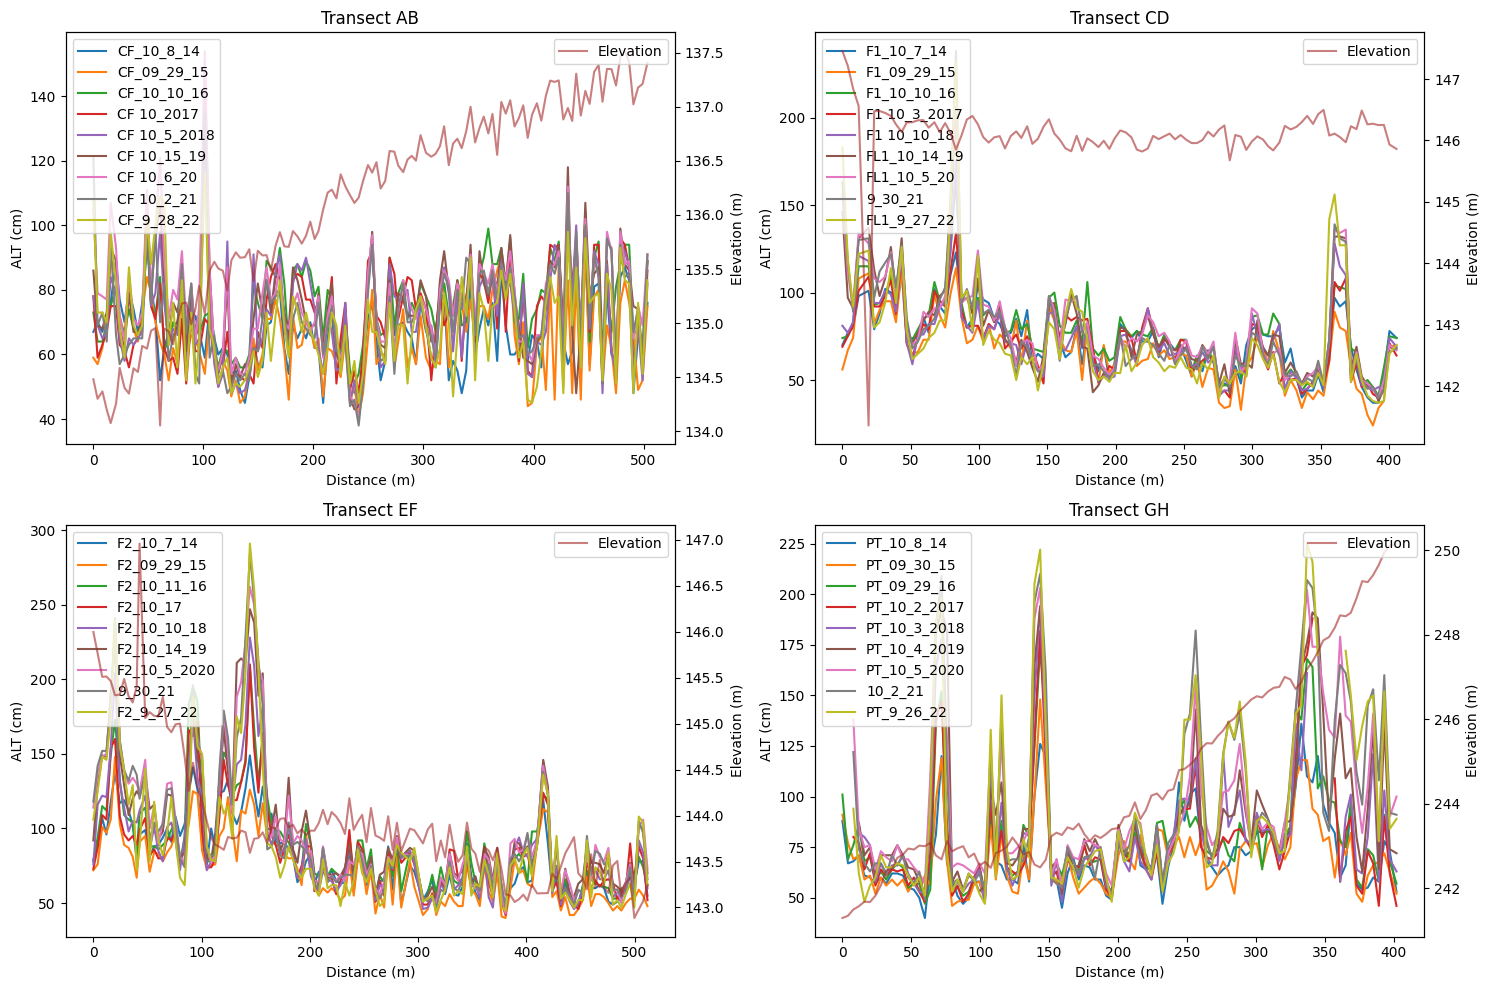

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/Azadeh/CRREL.xlsx'
sheets = ['Creamers', 'Farmers 1', 'Farmers 2', 'Tunnel']
titles = ['Transect AB', 'Transect CD', 'Transect EF', 'Transect GH']
distance_cols = ['CF_Dist_transect_m', 'FL1_Dist_transect_m', 'FL2_Dist_transect_m', 'PT_Dist_transect_m']
alt_cols = [
    ['CF_10_8_14', 'CF_09_29_15', 'CF_10_10_16', 'CF 10_2017', 'CF 10_5_2018', 'CF 10_15_19', 'CF 10_6_20', 'CF 10_2_21', 'CF_9_28_22'],
    ['F1_10_7_14', 'F1_09_29_15', 'F1_10_10_16', 'F1 10_3_2017', 'F1 10_10_18', 'FL1_10_14_19', 'FL1_10_5_20', '9_30_21', 'FL1_9_27_22'],
    ['F2_10_7_14', 'F2_09_29_15', 'F2_10_11_16', 'F2_10_17', 'F2_10_10_18', 'F2_10_14_19', 'F2_10_5_2020', '9_30_21', 'F2_9_27_22'],
    ['PT_10_8_14', 'PT_09_30_15', 'PT_09_29_16', 'PT_10_2_2017', 'PT_10_3_2018', 'PT_10_4_2019', 'PT_10_5_2020', '10_2_21', 'PT_9_26_22']
]
elevation_cols = ['CF_Elev_m', 'FL1_Elev_m', 'FL2_Elev_m', 'PT_Elev_m']

def create_subplot(ax, data, distance_col, alt_cols, elevation_col, title):
    data[distance_col] = pd.to_numeric(data[distance_col], errors='coerce')
    
    for col in alt_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
            ax.plot(data[distance_col], data[col], label=col)
    
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('ALT (cm)')
    ax.set_title(title)

    ax2 = ax.twinx()
    if elevation_col in data.columns:
        data[elevation_col] = pd.to_numeric(data[elevation_col], errors='coerce')
        ax2.plot(data[distance_col], data[elevation_col], color='brown', alpha=0.6, label='Elevation')
    ax2.set_ylabel('Elevation (m)')
    
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, sheet in enumerate(sheets):
    data = pd.read_excel(file_path, sheet_name=sheet)
    print(f"Columns in {sheet}: {data.columns.tolist()}")
    distance_col = distance_cols[i]
    elevation_col = elevation_cols[i]
    ax = axs[i // 2, i % 2]
    create_subplot(ax, data, distance_col, alt_cols[i], elevation_col, titles[i])

plt.tight_layout()
plt.show()

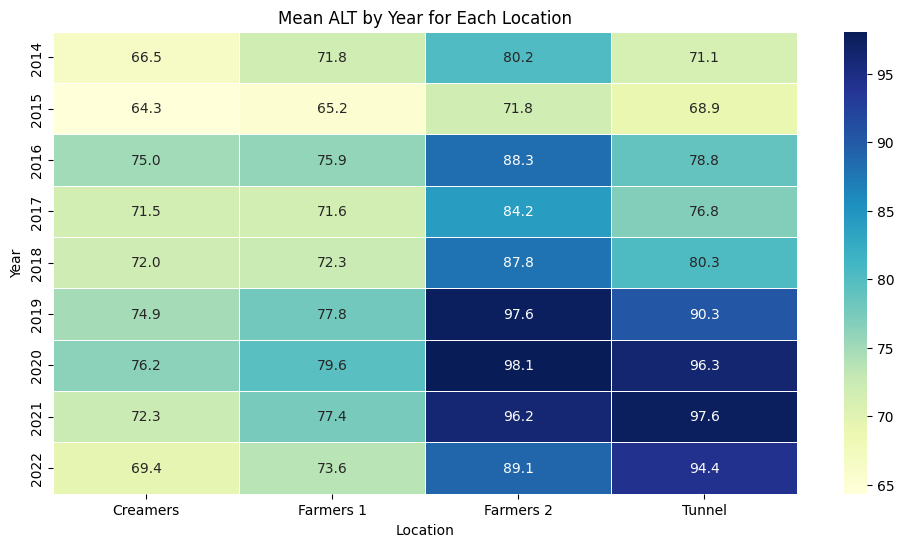

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/Azadeh/CRREL.xlsx'
sheets = ['Creamers', 'Farmers 1', 'Farmers 2', 'Tunnel']

alt_columns_dict = {
    'Creamers': ['CF_10_8_14', 'CF_09_29_15', 'CF_10_10_16', 'CF 10_2017', 'CF 10_5_2018', 'CF 10_15_19', 'CF 10_6_20', 'CF 10_2_21', 'CF_9_28_22'],
    'Farmers 1': ['F1_10_7_14', 'F1_09_29_15', 'F1_10_10_16', 'F1 10_3_2017', 'F1 10_10_18', 'FL1_10_14_19', 'FL1_10_5_20', '9_30_21', 'FL1_9_27_22'],
    'Farmers 2': ['F2_10_7_14', 'F2_09_29_15', 'F2_10_11_16', 'F2_10_17', 'F2_10_10_18', 'F2_10_14_19', 'F2_10_5_2020', '9_30_21', 'F2_9_27_22'],
    'Tunnel': ['PT_10_8_14', 'PT_09_30_15', 'PT_09_29_16', 'PT_10_2_2017', 'PT_10_3_2018', 'PT_10_4_2019', 'PT_10_5_2020', '10_2_21', 'PT_9_26_22']
}

def gather_mean_alt(sheet_name, alt_columns):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    mean_alt_by_year = pd.DataFrame()

    for alt_col in alt_columns:
        year = int(alt_col.split('_')[-1].split()[0][-2:])
        if year < 50:
            year += 2000
        else:
            year += 1900
        
        df['Year'] = year
        df[alt_col] = pd.to_numeric(df[alt_col], errors='coerce')
        year_mean = df.groupby('Year')[alt_col].mean().reset_index()
        year_mean.columns = ['Year', 'Mean_ALT']
        mean_alt_by_year = pd.concat([mean_alt_by_year, year_mean])

    mean_alt_by_year = mean_alt_by_year.groupby('Year')['Mean_ALT'].mean().reset_index()
    mean_alt_by_year['Location'] = sheet_name
    return mean_alt_by_year

all_data = pd.DataFrame()
for sheet in sheets:
    sheet_data = gather_mean_alt(sheet, alt_columns_dict[sheet])
    all_data = pd.concat([all_data, sheet_data])

pivot_data = all_data.pivot(index='Year', columns='Location', values='Mean_ALT')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Mean ALT by Year for Each Location')
plt.xlabel('Location')
plt.ylabel('Year')
plt.show()

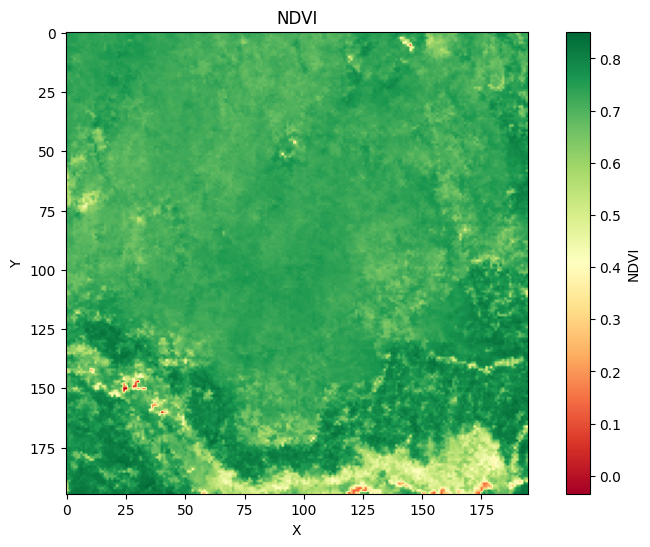

Mean NDVI: 0.7175946235656738
Median NDVI: 0.726357102394104
Standard Deviation of NDVI: 0.06461016088724136


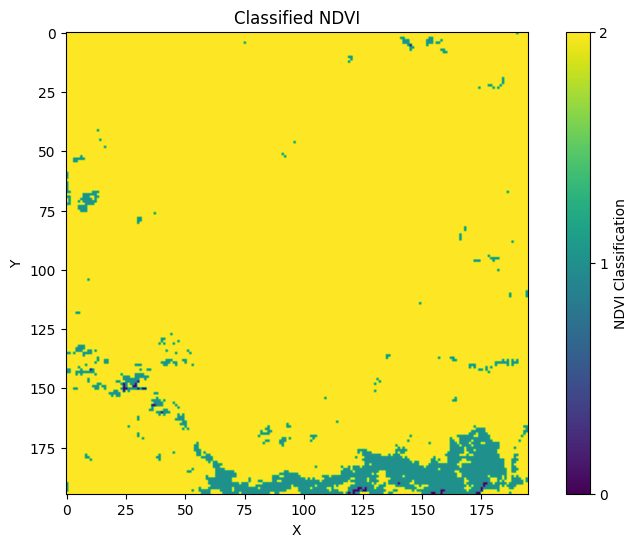

In [15]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

ndvi_file = '/Users/Azadeh/Downloads/NDVI 2/CF_NDVI.tif'
with rasterio.open(ndvi_file) as src:
    ndvi = src.read(1)

plt.figure(figsize=(10, 6))
plt.title('NDVI')
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

mean_ndvi = np.mean(ndvi)
median_ndvi = np.median(ndvi)
std_ndvi = np.std(ndvi)

print(f'Mean NDVI: {mean_ndvi}')
print(f'Median NDVI: {median_ndvi}')
print(f'Standard Deviation of NDVI: {std_ndvi}')

healthy_threshold = 0.6
unhealthy_threshold = 0.2

ndvi_classified = np.zeros_like(ndvi)
ndvi_classified[ndvi >= healthy_threshold] = 2  # Healthy
ndvi_classified[(ndvi >= unhealthy_threshold) & (ndvi < healthy_threshold)] = 1  # Moderate
ndvi_classified[ndvi < unhealthy_threshold] = 0  # Unhealthy

plt.figure(figsize=(10, 6))
plt.title('Classified NDVI')
plt.imshow(ndvi_classified, cmap='viridis')
plt.colorbar(ticks=[0, 1, 2], label='NDVI Classification')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
import pandas as pd

file_path = '/Users/Azadeh/CRREL_cleaned.xlsx'
excel_data = pd.ExcelFile(file_path)

average_distances = {}

for sheet in excel_data.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    distance_columns = [col for col in df.columns if col.endswith('_Dist_previous_m')]
    
    for col in distance_columns:
        average_distance = df[col].mean()
        average_distances[f"{sheet}_{col}"] = average_distance

for key, value in average_distances.items():
    print(f"Average distance in {key}: {value:.2f} meters")

average_distances_df = pd.DataFrame(list(average_distances.items()), columns=['Sheet_Column', 'Average_Distance'])
average_distances_df.to_csv('average_distances.csv', index=False)


Average distance in Creamers_CF_Dist_previous_m: 4.00 meters
Average distance in Farmers 1_FL1_Dist_previous_m: 4.02 meters
Average distance in Tunnel_PT_Dist_previous_m: 4.02 meters
Average distance in NaN_Values_CF_Dist_previous_m: nan meters
Average distance in NaN_Values_FL1_Dist_previous_m: nan meters
Average distance in NaN_Values_PT_Dist_previous_m: 3.55 meters


In [17]:
import pandas as pd

file_path = '/Users/Azadeh/CRREL_cleaned.xlsx'

excel_data = pd.read_excel(file_path, sheet_name=None)

location_counts = {sheet: len(data) for sheet, data in excel_data.items()}

for sheet, count in location_counts.items():
    print(f"The sheet '{sheet}' has {count} locations.")


The sheet 'Creamers' has 126 locations.
The sheet 'Farmers 1' has 101 locations.
The sheet 'Farmers 2' has 126 locations.
The sheet 'Tunnel' has 92 locations.
The sheet 'NaN_Values' has 46 locations.


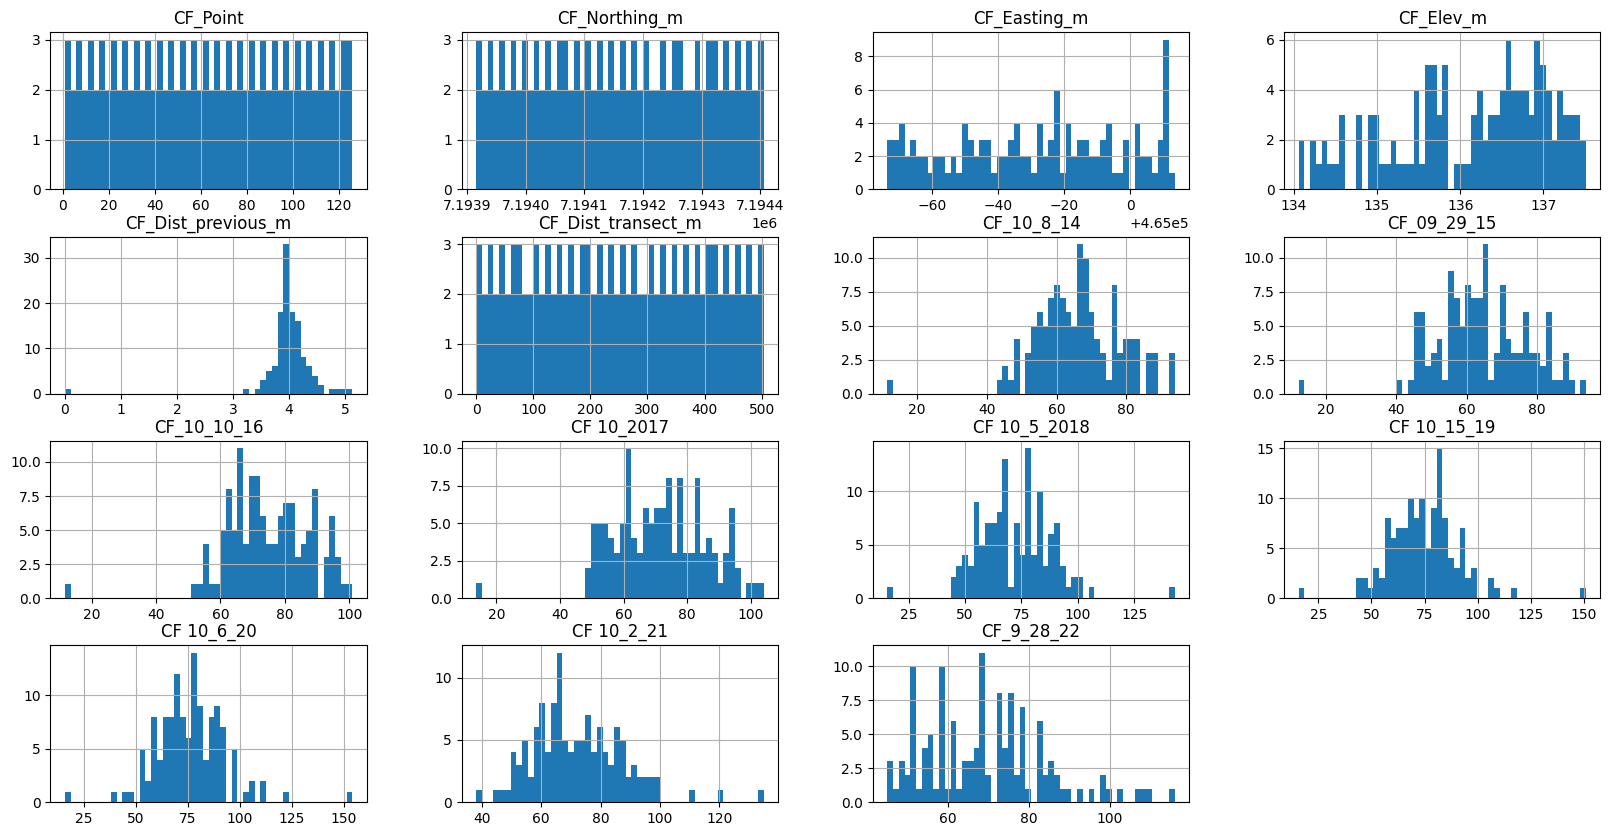

In [19]:
import pandas as pd
df = pd.read_excel('/Users/Azadeh/CRREL.xlsx')
df
_ = df.hist(bins=50 , figsize=(20, 10))